In [20]:
from datetime import datetime
from pony.orm import *
import configparser
import json
import redis
set_sql_debug(True)
from PIL import Image

In [15]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [10]:
provider="mysql"

In [111]:
db = Database()

db.bind(
    provider=provider, 
    host=config[provider]["host"],
    user=config[provider]["user"],
    passwd=config[provider]["pass"],
    db="media_index4",
)
try:
    db.drop_table("thumbnail")
except TableDoesNotExist:
    pass
except:
    raise


GET NEW CONNECTION
RELEASE CONNECTION
GET CONNECTION FROM THE LOCAL POOL
SET foreign_key_checks = 0
DROPPING TABLE `thumbnail`
COMMIT
SET foreign_key_checks = 1
CLOSE CONNECTION


In [112]:
class Thumbnail(db.Entity):
    id = PrimaryKey(int, auto=True)
    xxhash = Required(str, unique=True)
    thumbnail = Optional(buffer)
    height = Optional(int, size=16)
    width = Optional(int, size=16)
    depth = Optional(int, size=16)

db.generate_mapping(create_tables=True)

GET NEW CONNECTION
SET foreign_key_checks = 0
CREATE TABLE `thumbnail` (
  `id` INTEGER PRIMARY KEY AUTO_INCREMENT,
  `xxhash` VARCHAR(255) UNIQUE NOT NULL,
  `thumbnail` LONGBLOB,
  `height` SMALLINT,
  `width` SMALLINT,
  `depth` SMALLINT
)

SELECT `thumbnail`.`id`, `thumbnail`.`xxhash`, `thumbnail`.`thumbnail`, `thumbnail`.`height`, `thumbnail`.`width`, `thumbnail`.`depth`
FROM `thumbnail` `thumbnail`
WHERE 0 = 1

COMMIT
SET foreign_key_checks = 1
CLOSE CONNECTION


In [113]:
config = configparser.ConfigParser()
config.read('config.ini')
exif_cache = redis.StrictRedis(
    host=config["redis"]["host"],
    port=config["redis"]["port"],
    db=config["redis"]["exif"],
)
xxhash_cache = redis.StrictRedis(
    host=config["redis"]["host"],
    port=config["redis"]["port"],
    db=config["redis"]["xxhash"],
)

In [114]:
len(xxhash_cache.keys())

406071

In [115]:
for key in xxhash_cache.keys():
    break

In [116]:
xxhash_cache.get(key)

b'6ffd1f415dd3dfa7'

In [143]:
size = (255, 255)

In [144]:
path = key.decode()
xxhash = xxhash_cache.get(key).decode()

In [145]:
img = Image.open(path)
img.thumbnail(size)

In [146]:
import numpy as np

In [147]:
np_img = np.asarray(im)

In [148]:
height, width, depth = np_img.shape
height

248

In [149]:
width

165

In [150]:
depth

3

In [123]:
np_img_ = np_img.tobytes()

In [124]:
x = Thumbnail(xxhash=xxhash, thumbnail=np_img_, height=height, width=width, depth=depth)

In [134]:
X = Thumbnail.select()

In [136]:
for x_ in X:
    break
x_

SELECT DISTINCT `t-1`.`id`, `t-1`.`xxhash`, `t-1`.`thumbnail`, `t-1`.`height`, `t-1`.`width`, `t-1`.`depth`
FROM `thumbnail` `t-1`



Thumbnail[1]

In [164]:
x__ = np.frombuffer(x_.thumbnail, dtype=np.uint8).reshape(x_.height, x_.width, x_.depth)

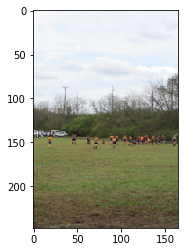

In [165]:
imshow(x__)

In [161]:
np.frombuffer(np_img_, dtype=np.uint8).shape

(122760,)

In [166]:
import base64

In [170]:
bytes(img)

TypeError: cannot convert 'JpegImageFile' object to bytes

In [175]:
Image.frombytes(np_img_)

TypeError: frombytes() missing 2 required positional arguments: 'size' and 'data'

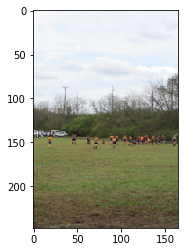

In [125]:
from matplotlib.pyplot import imshow
imshow(im)